In [1]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version: ", tf.__version__)

seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

Tensorflow version:  2.5.0


## Training Dataset

In [2]:
# Path to the data directory
train_data_dir = Path("data/train_data")

In [3]:
# Get list of all the images
training_images = list(train_data_dir.glob("*_*.png"))
print("Number of images found: ", len(training_images))

Number of images found:  50000


Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)
Shape of image:  (80, 215, 3)


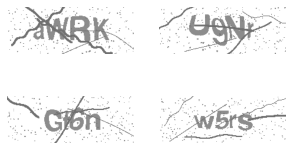

In [4]:
# Samples
sample_images = training_images[:4]
_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [15]:
# Store all the characters in a set
characters = set()

In [16]:
# A list to store the length of each captcha
captcha_length = []

In [17]:
# Store image-label info
training_dataset = []

In [18]:
# Iterate over the dataset and store the
# information needed
for img_path in training_images:
    # 1. Get the label associated with each image
    label = img_path.name.split("_")[0]
    # 2. Store the length of this cpatcha
    captcha_length.append(len(label))
    # 3. Store the image-label pair info
    training_dataset.append((str(img_path), label))
    # 4. Store the characters present
    for ch in label:
        characters.add(ch)

In [19]:
# Convert the dataset info into a dataframe
training_dataset = pd.DataFrame(training_dataset, columns=["img_path", "label"], index=None)
training_dataset

,img_path,label
0,data/train_data/aWRK_5f1ee509dd075.png,aWRK
1,data/train_data/UgNr_5f1f23c30348f.png,UgNr
2,data/train_data/Gt6n_5f1ee2fa336f1.png,Gt6n
3,data/train_data/w5rs_5f1f1db8dff84.png,w5rs
4,data/train_data/R7zp_5f1ee27c5f518.png,R7zp
...,...,...
49995,data/train_data/FtpC_5f1f27152cd03.png,FtpC
49996,data/train_data/uvZs_5f1ee6558179c.png,uvZs
49997,data/train_data/admV_5f1d93d3de732.png,admV
49998,data/train_data/4Vg4_5f1f20e688e32.png,4Vg4


In [20]:
# Shuffle the dataset
training_dataset = training_dataset.sample(frac=1.).reset_index(drop=True)
training_dataset

,img_path,label
0,data/train_data/tFZB_5f1f2729d3d3b.png,tFZB
1,data/train_data/A5MG_5f1f26b4261e1.png,A5MG
2,data/train_data/DWKe_5f1f1fd095a2c.png,DWKe
3,data/train_data/ve6C_5f1ee510521e2.png,ve6C
4,data/train_data/Prza_5f1f241306103.png,Prza
...,...,...
49995,data/train_data/F7NB_5f1ee2085dacb.png,F7NB
49996,data/train_data/nTda_5f1ee575d3c7e.png,nTda
49997,data/train_data/fnEl_5f1ee8964f341.png,fnEl
49998,data/train_data/zgZS_5f1f21d5dbed3.png,zgZS


In [21]:
print("Total number of samples in the training dataset: ", len(training_dataset))
training_dataset.head()

Total number of samples in the training dataset:  50000


,img_path,label
0,data/train_data/tFZB_5f1f2729d3d3b.png,tFZB
1,data/train_data/A5MG_5f1f26b4261e1.png,A5MG
2,data/train_data/DWKe_5f1f1fd095a2c.png,DWKe
3,data/train_data/ve6C_5f1ee510521e2.png,ve6C
4,data/train_data/Prza_5f1f241306103.png,Prza


## Testing Dataset

In [22]:
# Path to the data directory
test_data_dir = Path("data/test_data")

In [23]:
testing_images = list(test_data_dir.glob("*_*.png"))
print("Number of images found: ", len(testing_images))

Number of images found:  4000


In [24]:
testing_dataset = []

In [25]:
for img_path in testing_images:
    # 1. Get the label associated with each image
    label = img_path.name.split("_")[0]
    # 2. Store the length of this cpatcha
    captcha_length.append(len(label))
    # 3. Store the image-label pair info
    testing_dataset.append((str(img_path), label))
    # 4. Store the characters present
    for ch in label:
        characters.add(ch)

In [26]:
# Convert the dataset info into a dataframe
testing_dataset = pd.DataFrame(testing_dataset, columns=["img_path", "label"], index=None)
testing_dataset

,img_path,label
0,data/test_data/28sC_5f1f2defe0c37.png,28sC
1,data/test_data/CBtT_5f1f2d9f2d261.png,CBtT
2,data/test_data/PYT8_5f1f2e9582ce8.png,PYT8
3,data/test_data/Z5dR_5f1f2ee67f0ac.png,Z5dR
4,data/test_data/rWnh_5f1f2ea5167ae.png,rWnh
...,...,...
3995,data/test_data/fsdl_5f1f2e53b4df6.png,fsdl
3996,data/test_data/fL48_5f1f2e661fcf3.png,fL48
3997,data/test_data/FUd2_5f1f2da87de4d.png,FUd2
3998,data/test_data/zzcw_5f1f2df9c7463.png,zzcw


In [27]:
# Shuffle the dataset
testing_dataset = testing_dataset.sample(frac=1.).reset_index(drop=True)
testing_dataset

,img_path,label
0,data/test_data/MHLC_5f1f2df016b4f.png,MHLC
1,data/test_data/592L_5f1f2e4e3dbae.png,592L
2,data/test_data/GcZz_5f1f2dccac644.png,GcZz
3,data/test_data/TTvF_5f1f2ee097a5f.png,TTvF
4,data/test_data/h4kw_5f1f2dffab239.png,h4kw
...,...,...
3995,data/test_data/MFPU_5f1f2de961bb8.png,MFPU
3996,data/test_data/mDlR_5f1f2e87772a0.png,mDlR
3997,data/test_data/dApb_5f1f2d9370cb0.png,dApb
3998,data/test_data/9D9d_5f1f2ef82ed87.png,9D9d


In [28]:
print("Total number of samples in the testing dataset: ", len(testing_dataset))
testing_dataset.head()

Total number of samples in the testing dataset:  4000


,img_path,label
0,data/test_data/MHLC_5f1f2df016b4f.png,MHLC
1,data/test_data/592L_5f1f2e4e3dbae.png,592L
2,data/test_data/GcZz_5f1f2dccac644.png,GcZz
3,data/test_data/TTvF_5f1f2ee097a5f.png,TTvF
4,data/test_data/h4kw_5f1f2dffab239.png,h4kw


## Datasets Info

In [30]:
print("Number of unique charcaters in the whole dataset: ", len(characters))

Number of unique charcaters in the whole dataset:  50


In [31]:
print("Maximum length of any captcha: ", max(Counter(captcha_length).keys()))

Maximum length of any captcha:  4


In [32]:
# Sort the characters        
characters = sorted(characters)
print("Characters present: ", characters)

Characters present:  ['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']


In [33]:
# Check duplicates
both = pd.concat([training_dataset, testing_dataset])
len(both)

54000

In [34]:
len(both.drop_duplicates())

54000

In [35]:
training_dataset = training_dataset.reset_index(drop=True)
training_dataset.head()

,img_path,label
0,data/train_data/tFZB_5f1f2729d3d3b.png,tFZB
1,data/train_data/A5MG_5f1f26b4261e1.png,A5MG
2,data/train_data/DWKe_5f1f1fd095a2c.png,DWKe
3,data/train_data/ve6C_5f1ee510521e2.png,ve6C
4,data/train_data/Prza_5f1f241306103.png,Prza


In [36]:
testing_dataset = testing_dataset.reset_index(drop=True)
testing_dataset.head()

,img_path,label
0,data/test_data/MHLC_5f1f2df016b4f.png,MHLC
1,data/test_data/592L_5f1f2e4e3dbae.png,592L
2,data/test_data/GcZz_5f1f2dccac644.png,GcZz
3,data/test_data/TTvF_5f1f2ee097a5f.png,TTvF
4,data/test_data/h4kw_5f1f2dffab239.png,h4kw


In [37]:
print("Number of training samples: ", len(training_dataset))
print("Number of validation samples: ", len(testing_dataset))

Number of training samples:  50000
Number of validation samples:  4000


## Validations

In [55]:
# Map text to numeric labels 
char_to_labels = {char:idx for idx, char in enumerate(characters)}
char_to_labels

{'2': 0,
 '3': 1,
 '4': 2,
 '5': 3,
 '6': 4,
 '7': 5,
 '8': 6,
 '9': 7,
 'A': 8,
 'B': 9,
 'C': 10,
 'D': 11,
 'E': 12,
 'F': 13,
 'G': 14,
 'H': 15,
 'K': 16,
 'L': 17,
 'M': 18,
 'N': 19,
 'P': 20,
 'R': 21,
 'S': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'Y': 27,
 'Z': 28,
 'a': 29,
 'b': 30,
 'c': 31,
 'd': 32,
 'e': 33,
 'f': 34,
 'g': 35,
 'h': 36,
 'k': 37,
 'l': 38,
 'm': 39,
 'n': 40,
 'p': 41,
 'r': 42,
 's': 43,
 't': 44,
 'u': 45,
 'v': 46,
 'w': 47,
 'y': 48,
 'z': 49}

In [56]:
# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}
labels_to_char

{0: '2',
 1: '3',
 2: '4',
 3: '5',
 4: '6',
 5: '7',
 6: '8',
 7: '9',
 8: 'A',
 9: 'B',
 10: 'C',
 11: 'D',
 12: 'E',
 13: 'F',
 14: 'G',
 15: 'H',
 16: 'K',
 17: 'L',
 18: 'M',
 19: 'N',
 20: 'P',
 21: 'R',
 22: 'S',
 23: 'T',
 24: 'U',
 25: 'V',
 26: 'W',
 27: 'Y',
 28: 'Z',
 29: 'a',
 30: 'b',
 31: 'c',
 32: 'd',
 33: 'e',
 34: 'f',
 35: 'g',
 36: 'h',
 37: 'k',
 38: 'l',
 39: 'm',
 40: 'n',
 41: 'p',
 42: 'r',
 43: 's',
 44: 't',
 45: 'u',
 46: 'v',
 47: 'w',
 48: 'y',
 49: 'z'}

In [57]:
# Sanity check for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in characters:
            return False
    return True

In [68]:
# Store arrays in memory
def generate_arrays(df, resize=True, img_height=80, img_width=215):
    """Generate image array and labels array from a dataframe
    
    Args:
        df: dataframe from which we want to read the data
        resize(bool): whether to resize images or not
        img_width(int): width of the resized images
        img_heigth(int): heigth of the resized images
        
    Returns:
        images(ndarray): greyscale images
        labels(ndarray): corresponding encoded labels
    """
    num_items = len(df)
    images = np.zeros((num_items, img_height, img_width), dtype=np.float32)
    labels = [0]*num_items
    
    for i in range(num_items):
        img = cv2.imread(df['img_path'][i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        if resize:
            img = cv2.resize(img, (img_width, img_height))
        
        img = (img/255.).astype(np.float32)
        label = df['label'][i]
        
        # Add only if it is a valid captcha
        if is_valid_captcha(label):
            images[i, :, :] = img
            labels[i] = label
    
    return images, np.array(labels)

In [53]:
# Checking image colors

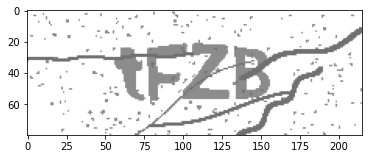

In [69]:
img = cv2.imread(training_dataset['img_path'][0])
img = cv2.resize(img, (215, 80))
img = (img/255.).astype(np.float32)
plt.imshow(img)

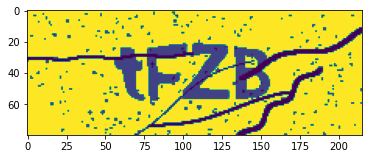

In [70]:
img = cv2.imread(training_dataset['img_path'][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (215, 80))
img = (img/255.).astype(np.float32)
plt.imshow(img)

In [71]:
label = training_dataset['label'][0]
is_valid_captcha(label)

True

In [72]:
# Build validated training data
training_data, training_labels = generate_arrays(df=training_dataset)
print("Number of training images: ", training_data.shape)
print("Number of training labels: ", training_labels.shape)

Number of training images:  (50000, 80, 215)
Number of training labels:  (50000,)


In [73]:
# Build validated testing data
testing_data, testing_labels = generate_arrays(df=testing_dataset)
print("Number of validation images: ", testing_data.shape)
print("Number of validation labels: ", testing_labels.shape)

Number of validation images:  (4000, 80, 215)
Number of validation labels:  (4000,)


## Data Generator

In [74]:
class DataGenerator(keras.utils.Sequence):
    """Generate batches from a given dataset
    
    Args:
        data: training o testing data
        labels: corresponding labels
        char_map: dictionary mapping char to labels
        batch_size: size of a single batch
        img_width: width of the resized images
        img_height: height of the resized images
        downsample_factor: by what factor did the CNN downsample the images
        max_length: maximum length of any captcha
        shuffle: whether to shuffle data or not after each epoch
    
    Returns:
        batch_inputs: a dictionary containing batch inputs
        batch_labels: a batch of corresponding labels
    """
    
    def __init__(self, 
                data,
                labels,
                char_map, 
                batch_size=16,
                img_width=215,
                img_height=80,
                downsample_factor=4,
                max_length=4,
                shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))    
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))
    
    def __getitem__(self, idx):
        # 1. Get the next batch indices
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        
        # 2. This isn't necessary but it can help us save some memory
        # as not all batches the last batch may not have elements
        # equal to the batch_size 
        batch_len = len(curr_batch_idx)
        
        # 3. Instantiate batch arrays
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                              dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                        (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)
        
        for j, idx in enumerate(curr_batch_idx):
            # 1. Get the image and transpose it
            img = self.data[idx].T
            # 2. Add extra dimension
            img = np.expand_dims(img, axis=-1)
            # 3. Get the corresponding label
            text = self.labels[idx]
            # 4. Include the pair only if the captcha is valid
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)

        batch_inputs = {
            'input_data': batch_images,
            'input_label': batch_labels, 
            'input_length': input_length,
            'label_length': label_length
            }

        return batch_inputs, np.zeros(batch_len).astype(np.float32)
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [97]:
# Batch size for training and testing
batch_size = 8

In [98]:
# Desired image dimensions
img_width = 215
img_height= 80

In [99]:
# Factor by which the image is going to be downsampled
# by the convolutional blocks
downsample_factor = 4

In [100]:
# Maximum length of any captcha in the data
max_length=4

In [101]:
# Get a generator object for the training data
train_data_generator = DataGenerator(data=testing_data,
                                    labels=testing_labels,
                                    char_map=char_to_labels,
                                    batch_size=batch_size,
                                    img_width=img_width,
                                    img_height=img_height,
                                    downsample_factor=downsample_factor,
                                    max_length=max_length,
                                    shuffle=True)
train_data_generator

In [102]:
# Get a generator object for the testing data
test_data_generator = DataGenerator(data=training_data,
                                    labels=training_labels,
                                    char_map=char_to_labels,
                                    batch_size=batch_size,
                                    img_width=img_width,
                                    img_height=img_height,
                                    downsample_factor=downsample_factor,
                                    max_length=max_length,
                                    shuffle=True)
test_data_generator

## Model

In [103]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn=keras.backend.ctc_batch_cost
    
    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training time loss value and add it 
        # to the layer using self.add_loss()
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        # On test tie, just return the computed loss
        return loss

In [104]:
def build_model():
    # Inputs to the model
    input_img=layers.Input(shape=(img_width, img_height, 1),
                            name='input_data',
                            dtype='float32')
    labels=layers.Input(name='input_label', shape=[max_length], dtype='float32')
    input_length=layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length=layers.Input(name='label_length', shape=[1], dtype='int64')
    
    # First conv block
    x=layers.Conv2D(32,
                   (3,3),
                   activation='relu',
                   kernel_initializer='he_normal',
                   padding='same',
                   name='Conv1')(input_img)
    x=layers.MaxPooling2D((2,2), name='pool1')(x)
    
    # Second conv block
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)
    
    # We have used two max pool with pool size and strides of 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing it to RNNs
    new_shape = ((img_width // 4), (img_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)
    
    # RNNs
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)
    
    # Predictions
    x = layers.Dense(len(characters)+1,
              activation='softmax', 
              name='dense2',
              kernel_initializer='he_normal')(x)
    
    # Calculate CTC
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)
    
    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')
    
    # Optimizer
    opt=keras.optimizers.Adam()
    
    # Compile the model and return 
    model.compile(optimizer=opt)
    return model

In [105]:
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 215, 80, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 215, 80, 32)  320         input_data[0][0]                 
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 107, 40, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 107, 40, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [106]:
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=10,
                                   restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(train_data_generator,
                    validation_data=test_data_generator,
                    epochs=500,
                    callbacks=[es])

Epoch 1/500
500/500 [==============================] - 227s 444ms/step - loss: 17.9973 - val_loss: 16.7238
Epoch 2/500
500/500 [==============================] - ETA: 0s - loss: 16.3713

## Prediction model

In [86]:
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='dense2').output)
prediction_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 215, 80, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 215, 80, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 107, 40, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 107, 40, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 53, 20, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 53, 1280)          0         
_________________________________________________________________
dense1 (Dense)               (None, 53, 64)            81984 

In [87]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    
    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)
    
    # return final text results
    return output_text

## Check results

In [92]:
#  Let's check results on some validation samples
for p, (inp_value, _) in enumerate(test_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']
    
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)
    
    
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)
        
    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
    break

Ground truth: k8dl 	 Predicted: t98l
Ground truth: TeZ9 	 Predicted: T728
Ground truth: gek3 	 Predicted: gep3
Ground truth: g9wb 	 Predicted: g9Wp
Ground truth: nRNY 	 Predicted: mFNT
Ground truth: Z8Mf 	 Predicted: 29Hb
Ground truth: ug6W 	 Predicted: yb8W
Ground truth: RhPA 	 Predicted: RA4
Ground truth: YDyM 	 Predicted: TPWM
Ground truth: gcBF 	 Predicted: geBP
Ground truth: rhKN 	 Predicted: hULl
Ground truth: acKm 	 Predicted: 3CDm
Ground truth: DWNV 	 Predicted: DHMW
Ground truth: LYK5 	 Predicted: LYK5
Ground truth: rMpw 	 Predicted: mwpw
Ground truth: 3fSh 	 Predicted: 3b8l
